# Setup and First Query

This notebook shows how to install `python-esios` and make your first API call.

## Install the library

In [1]:
!pip install python-esios

## Set your API key

Get a free API key from [ESIOS](https://www.esios.ree.es/) (login required).
Set it as an environment variable:

```bash
export ESIOS_API_KEY="your-token-here"
```

## Create the client

In [2]:
from esios import ESIOSClient

client = ESIOSClient()

## List available indicators

The ESIOS API exposes ~2000 indicators covering electricity prices,
generation, demand, and more.

In [3]:
df = client.indicators.list()
df

,name,short_name
id,,
1,Generación programada PBF Hidráulica UGH,Hidráulica UGH
2,Generación programada PBF Hidráulica no UGH,Hidráulica no UGH
3,Generación programada PBF Turbinación bombeo,Turbinación bombeo
4,Generación programada PBF Nuclear,Nuclear
5,Generación programada PBF Hulla antracita Anex...,Hulla antracita RD 134/2010
...,...,...
10521,Serie estadística generación total estimada Re...,Total estimada Renovable por CCAA
10522,Serie estadística generación total estimada si...,Total estimada sin emisiones por CCAA
10523,Precio medio cuarto horario componente importe...,Precio medio cuarto horario componente importe...


## Fetch historical data

Let's get the spot price (indicator 600) for one week:

In [4]:
handle = client.indicators.get(600)
df = handle.historical("2025-01-01", "2025-01-07")
df

,Portugal,Francia,España,Alemania,Bélgica,Países Bajos
datetime,,,,,,
2025-01-01 00:00:00+01:00,134.49,12.36,134.49,2.16,10.62,13.62
2025-01-01 00:15:00+01:00,134.49,12.36,134.49,2.16,10.62,13.62
2025-01-01 00:30:00+01:00,134.49,12.36,134.49,2.16,10.62,13.62
2025-01-01 00:45:00+01:00,134.49,12.36,134.49,2.16,10.62,13.62
2025-01-01 01:00:00+01:00,131.59,18.92,131.59,1.60,10.27,6.24
...,...,...,...,...,...,...
2025-01-07 22:45:00+01:00,98.53,98.53,98.53,72.45,111.04,82.20
2025-01-07 23:00:00+01:00,89.27,89.27,89.27,50.04,107.09,80.01
2025-01-07 23:15:00+01:00,89.27,89.27,89.27,50.04,107.09,80.01


The result is a DataFrame with a `DatetimeIndex` and one column per
geography (country). The data is timezone-aware (Europe/Madrid).

## Quick plot

<Axes: title={'center': 'Spot Price (€/MWh) — Indicator 600'}, xlabel='datetime'>

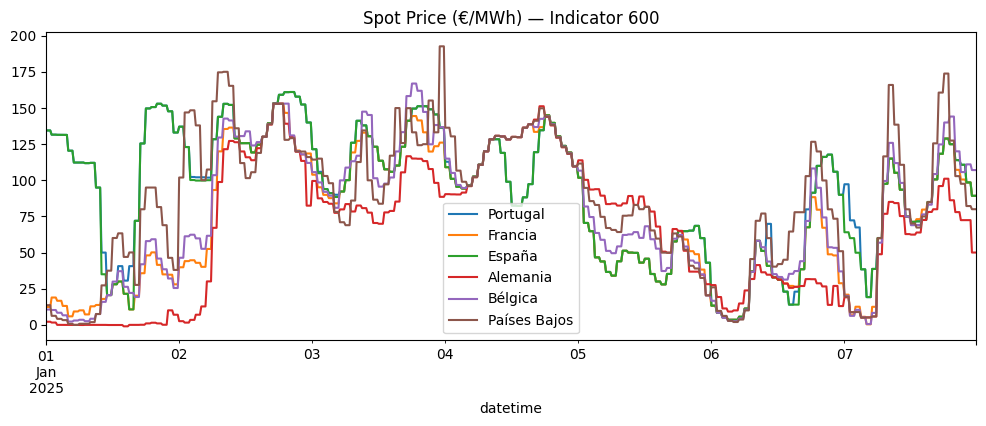

In [5]:
df.plot(figsize=(12, 4), title="Spot Price (€/MWh) — Indicator 600")